In [1]:
# from google.colab import drive
# drive.mount('/gdrive')

In [1]:
from fastai.vision import *

In [2]:
classes = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']

In [3]:
path = Path('../input/colored_images')
path.ls()

[WindowsPath('../input/images/export.pkl'),
 WindowsPath('../input/images/Mild'),
 WindowsPath('../input/images/models'),
 WindowsPath('../input/images/Moderate'),
 WindowsPath('../input/images/No_DR'),
 WindowsPath('../input/images/Proliferate_DR'),
 WindowsPath('../input/images/Severe')]

In [4]:
# remove the images that we cannot open
# for c in classes:
#     print(c)
#     verify_images(path/c, delete=True, max_size=500)

In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224, 
                                  num_workers=4).normalize(imagenet_stats)

In [6]:
data.classes

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

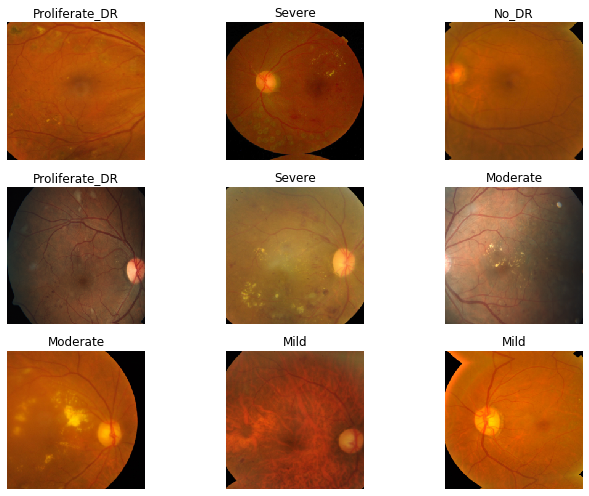

In [7]:
data.show_batch(rows=3, figsize=(10, 7))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe'], 5, 400, 100)

In [9]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)
# path = users/.cache/torch

In [10]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.431640,2.974358,0.700000,00:47
1,2.027406,2.812742,0.630000,00:30
2,1.903499,2.229043,0.610000,00:30


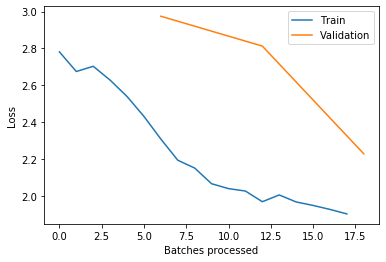

In [11]:
learn.recorder.plot_losses()

In [12]:
learn.save('../../../models/colored_stage_1')

In [13]:
learn.unfreeze()

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


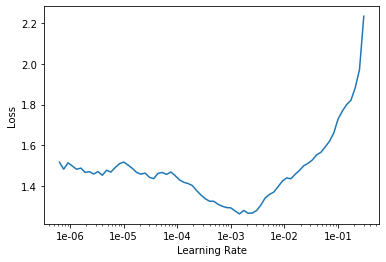

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(3, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.466747,2.192119,0.550000,00:35
1,1.360893,2.534284,0.600000,00:34
2,1.241861,2.059426,0.490000,00:35


In [17]:
learn.save('../../../models/colored_stage_2')

In [18]:
learn.load('../../../model/colored_stage_2')

FileNotFoundError: [Errno 2] No such file or directory: '..\\input\\images\\models\\..\\..\\..\\stage-2.pth'

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
learn.export()

In [ ]:
defaults.device = torch.device('cpu')

In [ ]:
img = open_image('train_images/ffec9a18a3ce.png')
img

In [ ]:
learn = load_learner(path)

In [ ]:
pred_class, pred_idx, outputs = learn.predict(img)
pred_class